In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA  

import warnings
warnings.filterwarnings('ignore')

#### In this challenge, I've explored the two datasets and done an exploratory data analysis to understand the relationship between different features. I have then merged the two datsets, engineered two features-Male_Ratio and Female_Ratio. In the later part, I've built a baseline regression model on the merged dataset to predict the proportion of paid preparers for a region.

In [2]:
#This dataset gives information on the income tax returns for all 50 states
irs=pd.read_csv('/Users/chinararora/Documents/Intuit Data Challenge/irs_public_data.csv')
irs.head(6)

,STATE,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
0,AL,0,1,870380,488030,122290,247000,500770,1452580,571240,11255896,767170,2005593
1,AL,0,2,490960,195840,155230,125280,286130,1027850,383240,17632481,418070,1192755
2,AL,0,3,258810,72710,146880,32860,157670,594910,189340,15916085,194360,552938
3,AL,0,4,163290,24860,126480,9790,98920,424160,134370,14161207,116830,385953
4,AL,0,5,192050,16930,168170,5450,115290,538120,177800,25777351,110760,441951
5,AL,0,6,46890,3530,42190,860,36250,137410,48270,20346741,14840,252825


In [3]:
#Getting to know the size of the dataset and column data types
irs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166740 entries, 0 to 166739
Data columns (total 13 columns):
STATE                            166740 non-null object
zipcode                          166740 non-null int64
agi_stub                         166740 non-null int64
num_returns                      166740 non-null int64
num_single_returns               166740 non-null int64
num_joint_returns                166740 non-null int64
num_head_of_household_returns    166740 non-null int64
num_paid_preparer_returns        166740 non-null int64
num_exemptions                   166740 non-null int64
num_dependents                   166740 non-null int64
amount_agi                       166740 non-null int64
num_returns_with_refunds         166740 non-null int64
amount_refunds                   166740 non-null int64
dtypes: int64(12), object(1)
memory usage: 16.5+ MB


In [4]:
irs.describe()

,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
count,166740.000000,166740.00000,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05,1.667400e+05
mean,48853.603275,3.50000,1.724367e+03,7.971176e+02,6.347534e+02,2.600802e+02,9.485901e+02,3.409576e+03,1.157908e+03,1.096239e+05,1.327396e+03,3.881419e+03
std,27140.030936,1.70783,3.691829e+04,2.128297e+04,1.136490e+04,7.082008e+03,2.065656e+04,6.753642e+04,2.421713e+04,2.328810e+06,2.991368e+04,7.812841e+04
min,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,27019.000000,2.00000,6.000000e+01,0.000000e+00,4.000000e+01,0.000000e+00,4.000000e+01,1.400000e+02,4.000000e+01,3.910000e+03,4.000000e+01,1.270000e+02
50%,48864.500000,3.50000,2.300000e+02,6.000000e+01,1.100000e+02,0.000000e+00,1.400000e+02,5.000000e+02,1.500000e+02,1.429400e+04,1.600000e+02,5.060000e+02
75%,70581.000000,5.00000,9.300000e+02,2.900000e+02,3.900000e+02,8.000000e+01,5.300000e+02,1.960000e+03,5.900000e+02,5.593575e+04,6.600000e+02,2.042000e+03
max,99999.000000,6.00000,6.411100e+06,4.279670e+06,1.561300e+06,1.156030e+06,3.905760e+06,1.036946e+07,3.834490e+06,4.439737e+08,5.136160e+06,1.054220e+07


In [5]:
irs.isna().any()

STATE                            False
zipcode                          False
agi_stub                         False
num_returns                      False
num_single_returns               False
num_joint_returns                False
num_head_of_household_returns    False
num_paid_preparer_returns        False
num_exemptions                   False
num_dependents                   False
amount_agi                       False
num_returns_with_refunds         False
amount_refunds                   False
dtype: bool

#### Number of returns and adjusted gross income have an asymettric distribution. They are skewed to the right with the median being smaller than the mean

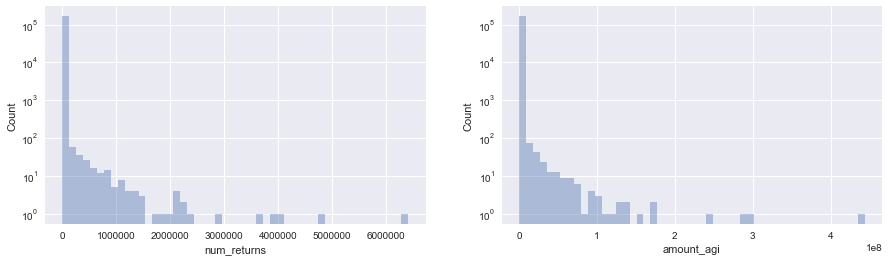

In [23]:
sns.set()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.ylabel('Count')
plt.yscale('log')
sns.distplot(irs['num_returns'],kde=False)
plt.subplot(1,2,2)
plt.ylabel('Count')
plt.xlabel('Number of returns')
plt.yscale('log')
sns.distplot(irs['amount_agi'],kde=False)

In [7]:
#Outlier Analysis:
irs.sort_values(by='num_returns',ascending=False).head()

,STATE,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,amount_agi,num_returns_with_refunds,amount_refunds
8454,CA,0,1,6411100,4279670,901940,1156030,3905760,10369460,3834490,81904456,5136160,10542197
138672,TX,0,1,4772560,2962970,646140,1110910,2355500,7744480,3034130,60177536,4138840,10183372
21810,FL,0,1,4052830,2551750,529950,897900,2110430,6160410,2038990,51383378,3391320,8104171
8455,CA,0,2,3916770,1826870,1170370,854660,2491560,8705130,3631710,141262404,3155860,8154263
95838,NY,0,1,3670420,2446890,477040,694990,2295730,5332580,1727430,43737586,2933520,6130146


#### 112366620 households fall in the lowest income bracket. About 109116960 households fall in the top income bracket.

In [8]:
agi=irs.groupby('agi_stub')['num_returns'].aggregate(numpy.sum)
agi

agi_stub
1    112366620
2     68119470
3     38550200
4     24740860
5     32826820
6     10916960
Name: num_returns, dtype: int64

In [9]:
#considering data for whole states
new_irs=irs[irs['zipcode']==0]
state_irs=new_irs.groupby('STATE',as_index=False)[['num_returns','num_paid_preparer_returns']].aggregate(numpy.sum)
state_irs.head()

,STATE,num_returns,num_paid_preparer_returns
0,AK,355150,150410
1,AL,2022380,1195030
2,AR,1203050,722040
3,AZ,2765040,1405150
4,CA,16861400,10696640


#### Maximum returns are filed by people in California and lowest by people in Wyoming

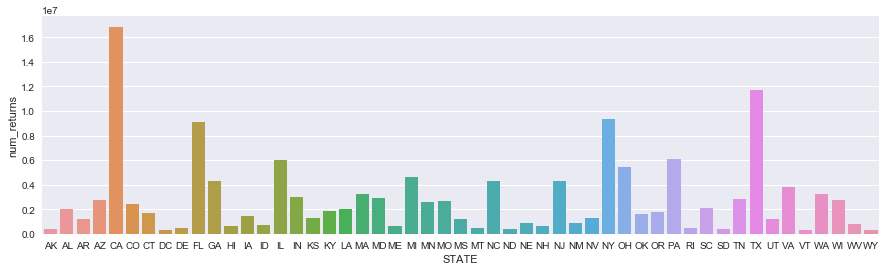

In [10]:
sns.set()
plt.figure(figsize=(15,4))
sns.barplot(x='STATE',y='num_returns',data=state_irs,ci=None)

#### It can be inferred that people belonging to the highest income bracket are the ones who consult tax stores and accountants the most for filing their taxes.

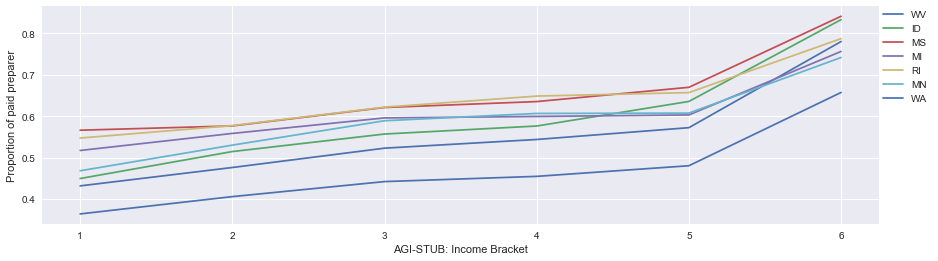

In [11]:
#For 8 random states, agi_stub and proportion of paid preparer has been plotted for sake of clarity
fig,axes=plt.subplots(figsize=(15,4))
states=state_irs[['STATE']].drop_duplicates()
state=states['STATE'].tolist()
new=new_irs.groupby('agi_stub')
st=new_irs
samp=numpy.random.choice(state, size=7, replace=False)
st['prop_paid_preparer_returns']=st['num_paid_preparer_returns']/st['num_returns']
new_test=st[['STATE','agi_stub','prop_paid_preparer_returns']]
for s in samp:
    subset = new_test[new_test['STATE'] == s][['agi_stub', 'prop_paid_preparer_returns']]
    axes.plot(subset['agi_stub'], subset['prop_paid_preparer_returns'], label=s)
plt.ylabel('Proportion of paid preparer')
plt.xlabel('AGI-STUB: Income Bracket')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
# plt.show()

#### ACS-Demographics Data

In [12]:
pop=pd.read_csv('/Users/chinararora/Documents/Intuit Data Challenge/acs_population_demographics.csv')
pop.head()

,ZIP,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
0,601,18088,8824,9264,5.8,5.9,5.6,6.3,6.6,6.1,...,1.8,1.5,2.1,37.1,36.2,38.9,95.3,63.8,24.2,39.7
1,602,40859,20079,20780,5.2,5.4,5.0,6.2,6.4,6.1,...,1.5,1.1,1.9,39.0,38.5,39.7,96.6,56.5,21.9,34.6
2,603,53162,25971,27191,5.3,5.6,5.0,6.4,6.8,6.0,...,1.3,0.7,1.8,39.2,37.4,40.8,95.5,64.4,28.0,36.5
3,606,6415,3188,3227,5.7,8.5,2.9,5.8,6.2,5.4,...,2.6,2.5,2.7,39.2,37.7,39.6,98.8,62.9,24.6,38.4
4,610,28805,13958,14847,5.2,5.4,5.1,5.4,5.4,5.4,...,1.5,1.5,1.5,39.7,36.8,41.3,94.0,62.5,26.0,36.6


In [13]:
#Data Treatment
pop.dropna(axis=0,inplace=True)

In [14]:
#pop.info()
#50 columns- each of which are divided on the basis of sex and age-group with width of 5 years
pop.describe()

,ZIP,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
count,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000,31313.00000,31313.000000,31313.000000,31313.000000,31313.000000,...,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000,31313.000000
mean,49545.079679,10132.559672,4981.724396,5150.835276,5.773532,5.91928,5.609463,6.159103,6.279006,6.013640,...,1.985833,1.415192,2.546131,41.530786,40.572293,42.374586,104.467675,66.599885,28.893827,37.706068
std,27377.974977,14305.266527,6998.858205,7326.772234,3.033999,3.85029,3.735095,2.953486,3.751675,3.708851,...,1.871854,1.892056,2.627691,7.793482,8.357746,8.209384,150.812042,24.242890,20.566469,14.038790
min,601.000000,13.000000,7.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.800000,2.900000,1.900000,10.300000,0.000000,0.000000,0.000000
25%,27212.000000,902.000000,457.000000,442.000000,4.100000,3.70000,3.500000,4.600000,4.200000,4.000000,...,0.900000,0.300000,0.900000,36.500000,35.200000,37.300000,91.500000,55.800000,18.900000,30.400000
50%,49756.000000,3261.000000,1634.000000,1610.000000,5.700000,5.80000,5.400000,6.100000,6.200000,5.900000,...,1.600000,1.000000,2.100000,41.300000,40.100000,42.400000,98.200000,64.000000,25.300000,37.100000
75%,71662.000000,14262.000000,7020.000000,7237.000000,7.200000,7.60000,7.200000,7.600000,8.000000,7.600000,...,2.600000,1.900000,3.400000,46.000000,45.300000,47.200000,107.100000,73.900000,33.500000,44.000000
max,99929.000000,115013.000000,59208.000000,59173.000000,41.800000,58.30000,57.800000,45.000000,63.200000,58.000000,...,44.600000,41.600000,56.500000,83.400000,83.200000,94.300000,19400.000000,1031.300000,956.300000,279.100000


#### I have now merged the two datasets on ZIP. The ZIP for ACS data is a generalised ZIPCODE(ZCTA)refering the most popular delivery routes in the region

In [15]:
data_merged=pd.merge(irs,pop,left_on='zipcode',right_on='ZIP',how='inner')
data_merged['Male_ratio']=data_merged['Male; Estimate; Total population']/data_merged['Total; Estimate; Total population']
data_merged['Female_ratio']=data_merged['Female; Estimate; Total population']/data_merged['Total; Estimate; Total population'] 
data_merged.head()

,STATE,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,...,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio,Male_ratio,Female_ratio
0,AL,35004,1,1530,950,260,300,800,2250,710,...,2.4,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334
1,AL,35004,2,1330,590,410,270,680,2600,860,...,2.4,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334
2,AL,35004,3,910,290,490,110,450,2020,620,...,2.4,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334
3,AL,35004,4,610,90,490,40,300,1630,530,...,2.4,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334
4,AL,35004,5,510,40,460,0,260,1420,450,...,2.4,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334


#### Building a regression model to predict the proportion of paid preparers  for a region given number of single,joint,Head of household returns,number of dependents,income bracket and adjusted gross income.

In [16]:
fea=['num_single_returns','num_joint_returns','num_head_of_household_returns','num_paid_preparer_returns','num_dependents','num_returns_with_refunds']
data_merged=data_merged.drop(data_merged[data_merged['num_returns']==0].index)
for col in fea:
    data_merged[col]=data_merged[col]/data_merged['num_returns']
data_merged['prop_paid_preparer_returns']=data_merged['num_paid_preparer_returns']/data_merged['num_returns']
data_merged.head()

,STATE,zipcode,agi_stub,num_returns,num_single_returns,num_joint_returns,num_head_of_household_returns,num_paid_preparer_returns,num_exemptions,num_dependents,...,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio,Male_ratio,Female_ratio,prop_paid_preparer_returns
0,AL,35004,1,1530,0.620915,0.169935,0.196078,0.522876,2250,0.464052,...,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334,0.000342
1,AL,35004,2,1330,0.443609,0.308271,0.203008,0.511278,2600,0.646617,...,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334,0.000384
2,AL,35004,3,910,0.318681,0.538462,0.120879,0.494505,2020,0.681319,...,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334,0.000543
3,AL,35004,4,610,0.147541,0.803279,0.065574,0.491803,1630,0.868852,...,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334,0.000806
4,AL,35004,5,510,0.078431,0.901961,0.000000,0.509804,1420,0.882353,...,39.3,38.1,42.9,100.3,43.8,16.1,27.7,0.500666,0.499334,0.001000


In [17]:
#Considering regions and not entire states
features=data_merged[data_merged['zipcode']!=0]
#features=data_merged.drop(['num_paid_preparer_returns','num_returns','zipcode','num_returns_with_refunds','amount_refunds','num_exemptions'],axis=1)
features=data_merged[['STATE','agi_stub','Male_ratio','Female_ratio','num_single_returns','num_joint_returns','num_head_of_household_returns','num_dependents','amount_agi','num_exemptions']]
features.head()


,STATE,agi_stub,Male_ratio,Female_ratio,num_single_returns,num_joint_returns,num_head_of_household_returns,num_dependents,amount_agi,num_exemptions
0,AL,1,0.500666,0.499334,0.620915,0.169935,0.196078,0.464052,19524,2250
1,AL,2,0.500666,0.499334,0.443609,0.308271,0.203008,0.646617,48895,2600
2,AL,3,0.500666,0.499334,0.318681,0.538462,0.120879,0.681319,55761,2020
3,AL,4,0.500666,0.499334,0.147541,0.803279,0.065574,0.868852,52579,1630
4,AL,5,0.500666,0.499334,0.078431,0.901961,0.000000,0.882353,63848,1420


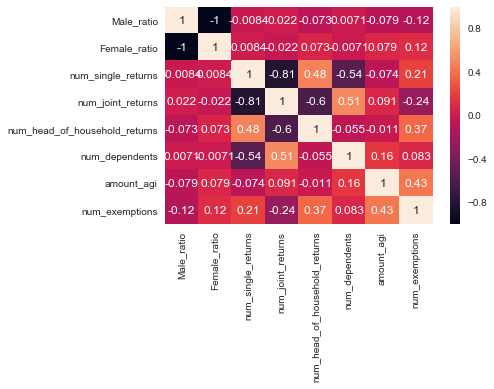

In [18]:
cor_map=features.drop(['STATE','agi_stub'],axis=1)
cor=cor_map.corr()
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)

#### Using one hot encoding to convert categorical variables into binary values

In [19]:
dummie_agi = pd.get_dummies(features['agi_stub'],prefix='agi_stub_')
features=pd.concat([features,dummie_agi],axis=1)
features.drop(['agi_stub'],axis=1,inplace=True)
features=pd.get_dummies(features)
features.head()

,Male_ratio,Female_ratio,num_single_returns,num_joint_returns,num_head_of_household_returns,num_dependents,amount_agi,num_exemptions,agi_stub__1,agi_stub__2,...,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,0.500666,0.499334,0.620915,0.169935,0.196078,0.464052,19524,2250,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.500666,0.499334,0.443609,0.308271,0.203008,0.646617,48895,2600,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.500666,0.499334,0.318681,0.538462,0.120879,0.681319,55761,2020,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.500666,0.499334,0.147541,0.803279,0.065574,0.868852,52579,1630,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.500666,0.499334,0.078431,0.901961,0.000000,0.882353,63848,1420,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Normalising all features

In [20]:
x = features.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#### Fitting a Linear Regression Model

In [21]:
X_train,X_test,y_train,y_test=train_test_split(df,data_merged['prop_paid_preparer_returns'],test_size=0.2,random_state=0)
regress_model=LinearRegression()
regress_model.fit(X_train,y_train)
y_pred=regress_model.predict(X_test)
print('Root mean squared error: ',numpy.sqrt(mean_squared_error(y_test, y_pred)))


Root mean squared error:  0.007437205874991226


#### Conclusion and future work:


#### In this challenge, a regression model has been built to predict the propotion of tax returns that will be filed by tax agents and accountants for a given region. Due to time constraints, the regression model could not be optimised to give a better model accuracy. The features here have been selected on the basis of intuition. Given more time, I would use forward and backward elimination to select the correct features. Also, I would like to try decsion tree regression technique as it would enable me to know the most important feature determining proportion of paid preparers. I also believe that the ACS-population data can be used more wisely.